In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from matplotlib import style
import datetime

In [2]:
os.chdir(r'C:\\Users\\Rohit\\Stock predictor 1\\Stocks\\' )

In [3]:
def stock_graph(symbol,title):
    df = pd.read_csv("C:\\Users\\Rohit\\Stock predictor 1\\Stocks\\{}.us.txt".format(symbol))
    df[['Close']].plot()
    plt.title(title)
    plt.show()


In [4]:
amazon= pd.read_csv('amzn.us.txt', header=0, sep=',', quotechar='"')
amazon.set_index('Date',inplace=True)

In [5]:
apple= pd.read_csv('aapl.us.txt', header=0, sep=',', quotechar='"')
apple.set_index('Date',inplace=True)

In [6]:
am=pd.DataFrame(amazon)

In [7]:
ap=pd.DataFrame(apple)
print(apple.head(10))

               Open     High      Low    Close    Volume  OpenInt
Date                                                             
1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0
1984-09-14  0.44052  0.45589  0.44052  0.44566  68847968        0
1984-09-17  0.45718  0.46357  0.45718  0.45718  53755262        0
1984-09-18  0.45718  0.46103  0.44052  0.44052  27136886        0
1984-09-19  0.44052  0.44566  0.43157  0.43157  29641922        0
1984-09-20  0.43286  0.43668  0.43286  0.43286  18453585        0


In [8]:
google=pd.read_csv('gogl.us.txt', header=0, sep=',', quotechar='"')

In [9]:
print(amazon[['High', 'Low']])

                High       Low
Date                          
1997-05-16     1.980     1.710
1997-05-19     1.770     1.620
1997-05-20     1.750     1.640
1997-05-21     1.650     1.380
1997-05-22     1.450     1.310
1997-05-23     1.520     1.330
1997-05-27     1.650     1.460
1997-05-28     1.640     1.530
1997-05-29     1.540     1.480
1997-05-30     1.510     1.480
1997-06-02     1.530     1.500
1997-06-03     1.530     1.480
1997-06-04     1.490     1.400
1997-06-05     1.540     1.380
1997-06-06     1.710     1.510
1997-06-09     1.710     1.660
1997-06-10     1.710     1.530
1997-06-11     1.600     1.530
1997-06-12     1.650     1.550
1997-06-13     1.620     1.580
1997-06-16     1.600     1.560
1997-06-17     1.600     1.490
1997-06-18     1.540     1.500
1997-06-19     1.530     1.500
1997-06-20     1.550     1.500
1997-06-23     1.540     1.480
1997-06-24     1.530     1.480
1997-06-25     1.530     1.490
1997-06-26     1.520     1.510
1997-06-27     1.520     1.480
...     

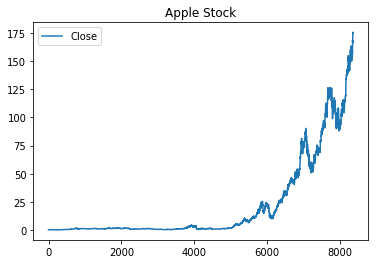

In [10]:
stock_graph("aapl","Apple Stock")

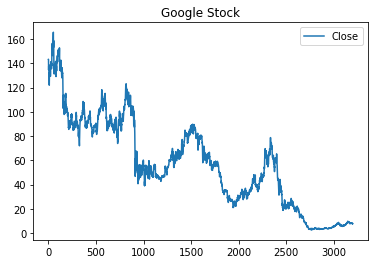

In [11]:
stock_graph("gogl","Google Stock")

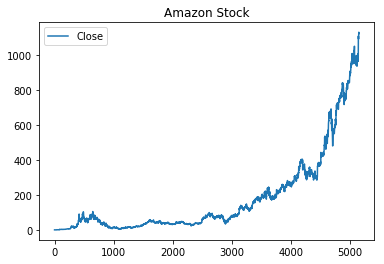

In [12]:
stock_graph("amzn","Amazon Stock")

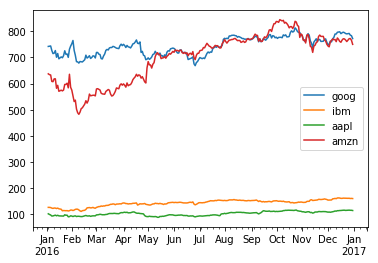

In [13]:
# Get stock data for multiple stocks for given symbols and dates and graph it
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("C:\\Users\\Rohit\\Stock predictor 1\\Stocks\\{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

dates = pd.date_range('2016-01-02','2016-12-31',freq='B')
symbols = ['goog','ibm','aapl','amzn']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
#print(df)
df.interpolate().plot()
plt.show()

goog    742.580
ibm     125.970
aapl     98.885
amzn    633.790
Name: 2016-01-05 00:00:00, dtype: float64


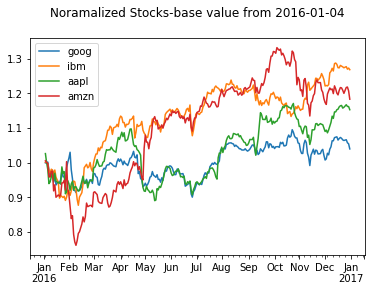

In [14]:
# Normalized Stocks - base value from 2016-01-04
print(df.iloc[1,:])
df = df / df.iloc[1,:]
df.interpolate().plot()
plt.title("Noramalized Stocks-base value from 2016-01-04\n")
plt.show()

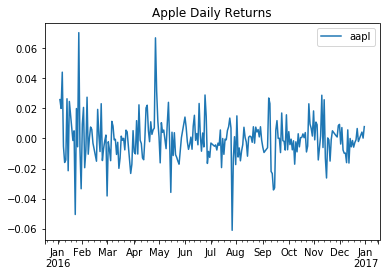

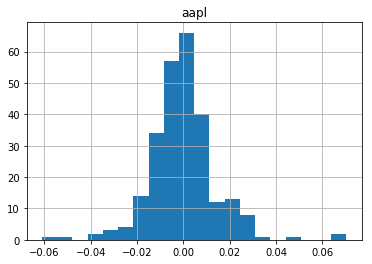

In [15]:
# Daily Returns for a symbol with date range
def daily_return(df):
    dr = df.copy()
    dr = dr[:-1].values / dr[1:] - 1
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aapl']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr = dr.interpolate()
dr.interpolate().plot()
plt.title('Apple Daily Returns')
plt.show()
dr.hist(bins=20)
plt.show()

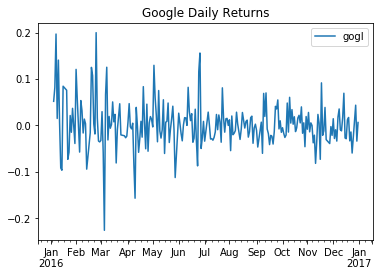

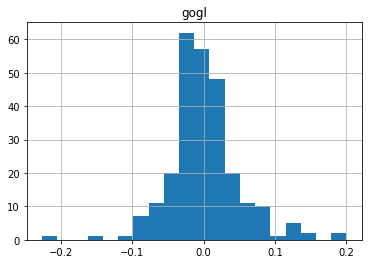

In [16]:
symbols= ['gogl']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr = dr.interpolate()
dr.interpolate().plot()
plt.title('Google Daily Returns')
plt.show()
dr.hist(bins=20)
plt.show()


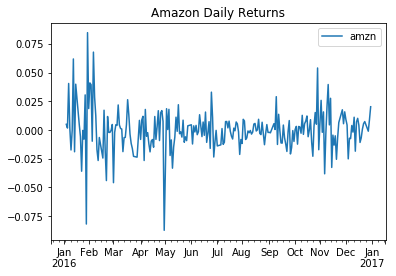

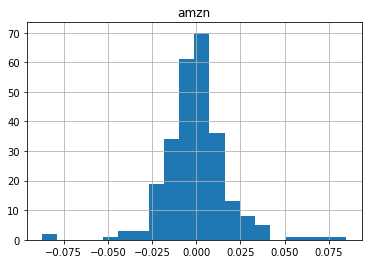

In [17]:
symbols= ['amzn']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr = dr.interpolate()
dr.interpolate().plot()
plt.title('Amazon Daily Returns')
plt.show()
dr.hist(bins=20)
plt.show()


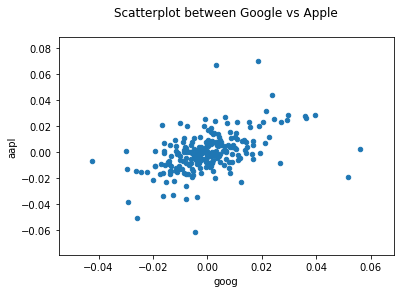

In [18]:
# Scatterplot between GOOG vs AAPL
dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['goog','aapl']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr.plot(kind='scatter',x='goog', y='aapl')
plt.title('Scatterplot between Google vs Apple\n')
plt.show()

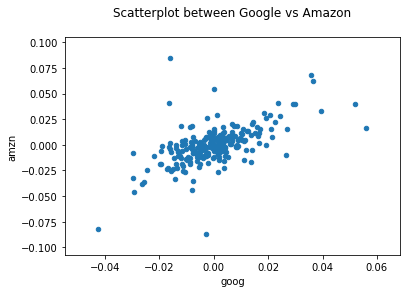

In [19]:
# Scatterplot between GOOG vs AAPL
dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['goog','amzn']
df = stocks_data(symbols, dates)
dr = daily_return(df)
dr.plot(kind='scatter',x='goog', y='amzn')
plt.title('Scatterplot between Google vs Amazon\n')
plt.show()

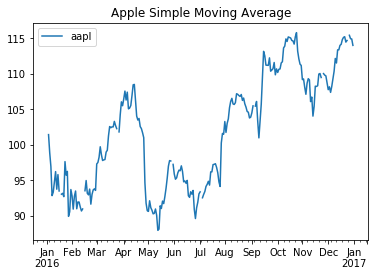

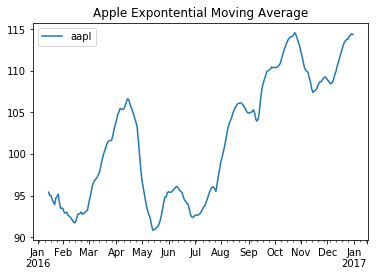

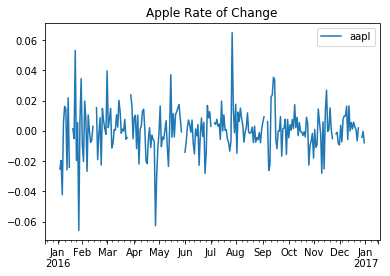

In [20]:
# Technical Indicators
# Bollinger Bands
def get_bbands(df, ndays):
    db = df.copy()
    dm = df.rolling(ndays).mean()
    ds = df.rolling(ndays).std()
    db['upperBB'] = dm + 2 * ds
    db['lowerBB'] = dm - 2 * ds
    return db

# Simple Moving Average
def get_SMA(df, ndays):
    dm = df.copy()
    dm.rolling(ndays).mean()
    return dm

# Expontential Moving Average
def get_EMA(df, ndays):
    dm = df.ewm( span = ndays, min_periods = ndays - 1).mean()
    return dm

# Rate of Change
def get_ROC(df, ndays):
    dn = df.diff(ndays)
    dd = df.shift(ndays)
    dr = dn/dd
    return dr

dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['aapl']
df = stocks_data(symbols, dates)
dm = get_SMA(df, 10)
dm.plot()
plt.title('Apple Simple Moving Average')
plt.show()
dm = get_EMA(df, 10)
dm.plot()
plt.title('Apple Expontential Moving Average')
plt.show()

dr = get_ROC(df, 1)
dr.plot()
plt.title('Apple Rate of Change')
plt.show()



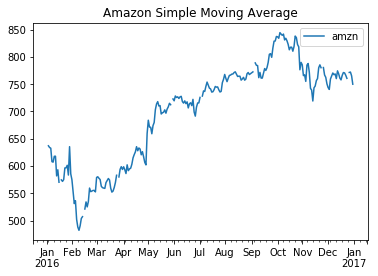

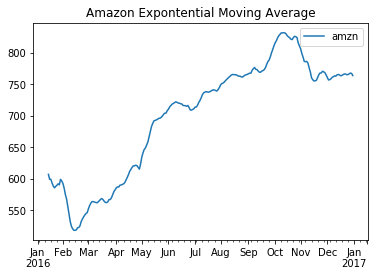

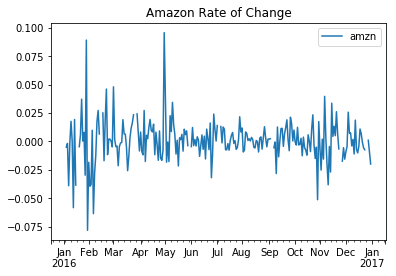

In [21]:
dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['amzn']
df = stocks_data(symbols, dates)
dm = get_SMA(df, 10)
dm.plot()
plt.title('Amazon Simple Moving Average')
plt.show()
dm = get_EMA(df, 10)
dm.plot()
plt.title('Amazon Expontential Moving Average')
plt.show()

dr = get_ROC(df, 1)
dr.plot()
plt.title('Amazon Rate of Change')
plt.show()

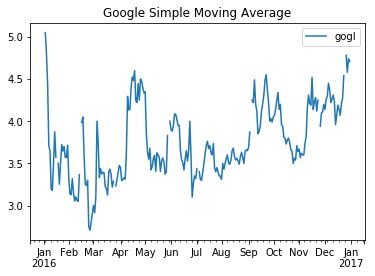

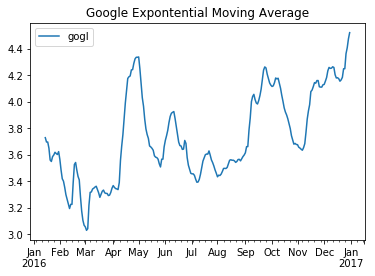

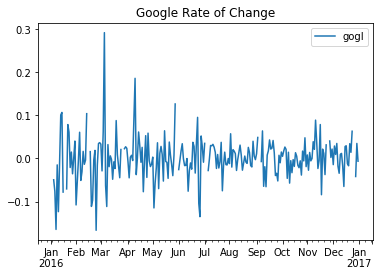

In [22]:
dates = pd.date_range('2016-01-01','2016-12-31',freq='B')
symbols = ['gogl']
df = stocks_data(symbols, dates)
dm = get_SMA(df, 10)
dm.plot()
plt.title('Google Simple Moving Average')
plt.show()
dm = get_EMA(df, 10)
dm.plot()
plt.title('Google Expontential Moving Average')
plt.show()

dr = get_ROC(df, 1)
dr.plot()
plt.title('Google Rate of Change')
plt.show()

In [30]:
amazon.shape

(5153, 6)

In [31]:
print(np.array(amazon[['High','Low']]))

[[   1.98    1.71]
 [   1.77    1.62]
 [   1.75    1.64]
 ...
 [1135.54 1119.11]
 [1129.62 1115.77]
 [1131.75 1124.06]]


In [32]:
print(amazon.High.tolist())

[1.98, 1.77, 1.75, 1.65, 1.45, 1.52, 1.65, 1.64, 1.54, 1.51, 1.53, 1.53, 1.49, 1.54, 1.71, 1.71, 1.71, 1.6, 1.65, 1.62, 1.6, 1.6, 1.54, 1.53, 1.55, 1.54, 1.53, 1.53, 1.52, 1.52, 1.6, 1.54, 1.59, 1.92, 2.02, 2.33, 2.39, 2.57, 2.52, 2.33, 2.48, 2.49, 2.34, 2.22, 2.2, 2.19, 2.33, 2.31, 2.25, 2.4, 2.5, 2.51, 2.44, 2.42, 2.41, 2.33, 2.31, 2.26, 2.3, 2.33, 2.3, 2.23, 2.25, 2.16, 2.05, 2.21, 2.19, 2.17, 2.12, 2.26, 2.35, 2.32, 2.4, 2.38, 2.38, 2.42, 2.55, 2.67, 3.02, 3.39, 3.33, 3.33, 3.7, 3.68, 3.54, 3.5, 3.47, 4.08, 4.68, 4.65, 4.81, 4.35, 4.26, 4.19, 4.35, 4.5, 4.18, 4.12, 4.12, 4.19, 4.17, 4.02, 4.06, 4.04, 4.1, 3.97, 3.98, 3.66, 3.88, 4.44, 4.62, 4.56, 5.06, 5.01, 5.0, 5.5, 5.35, 5.46, 5.22, 5.05, 5.12, 4.92, 4.64, 4.56, 4.31, 4.19, 3.97, 4.21, 4.54, 4.48, 4.52, 4.6, 4.58, 4.42, 4.33, 4.41, 4.33, 4.38, 4.3, 4.38, 4.55, 4.59, 4.77, 4.77, 4.62, 4.83, 4.8, 4.67, 4.65, 4.46, 4.43, 4.52, 4.78, 4.74, 4.71, 4.65, 4.78, 4.91, 5.04, 5.0, 4.94, 4.88, 4.83, 4.7, 4.67, 4.39, 4.67, 4.88, 5.01, 4.98, 

In [33]:
amazon.shape

(5153, 6)

In [34]:
n=0
dirListing = os.listdir('C:\\Users\\Rohit\\Stock predictor 1\\Stocks\\')
editFiles = []
for item in dirListing:
    if ".txt" in item:
        n=n+1
        editFiles.append(item)
print(editFiles)

['a.us.txt', 'aa.us.txt', 'aaap.us.txt', 'aaba.us.txt', 'aac.us.txt', 'aal.us.txt', 'aamc.us.txt', 'aame.us.txt', 'aan.us.txt', 'aaoi.us.txt', 'aaon.us.txt', 'aap.us.txt', 'aapl.us.txt', 'aat.us.txt', 'aau.us.txt', 'aav.us.txt', 'aaww.us.txt', 'aaxn.us.txt', 'ab.us.txt', 'abac.us.txt', 'abax.us.txt', 'abb.us.txt', 'abbv.us.txt', 'abc.us.txt', 'abcb.us.txt', 'abcd.us.txt', 'abco.us.txt', 'abdc.us.txt', 'abe.us.txt', 'abeo.us.txt', 'abeow.us.txt', 'abev.us.txt', 'abg.us.txt', 'abil.us.txt', 'abio.us.txt', 'ablx.us.txt', 'abm.us.txt', 'abmd.us.txt', 'abr.us.txt', 'abrn.us.txt', 'abr_a.us.txt', 'abr_b.us.txt', 'abr_c.us.txt', 'abt.us.txt', 'abtx.us.txt', 'abus.us.txt', 'abx.us.txt', 'aby.us.txt', 'ac.us.txt', 'acad.us.txt', 'acbi.us.txt', 'acc.us.txt', 'acco.us.txt', 'accp.us.txt', 'acer.us.txt', 'acerw.us.txt', 'acet.us.txt', 'acfc.us.txt', 'acgl.us.txt', 'acglo.us.txt', 'acglp.us.txt', 'ach.us.txt', 'achc.us.txt', 'achn.us.txt', 'achv.us.txt', 'acia.us.txt', 'aciu.us.txt', 'aciw.us.txt',

In [35]:
print(am)

               Open      High       Low    Close    Volume  OpenInt
Date                                                               
1997-05-16     1.97     1.980     1.710     1.73  14700000        0
1997-05-19     1.76     1.770     1.620     1.71   6106800        0
1997-05-20     1.73     1.750     1.640     1.64   5467200        0
1997-05-21     1.64     1.650     1.380     1.43  18853200        0
1997-05-22     1.44     1.450     1.310     1.40  11776800        0
1997-05-23     1.41     1.520     1.330     1.50  15937200        0
1997-05-27     1.51     1.650     1.460     1.58   8697600        0
1997-05-28     1.62     1.640     1.530     1.53   4574400        0
1997-05-29     1.54     1.540     1.480     1.51   3472800        0
1997-05-30     1.50     1.510     1.480     1.50   2594400        0
1997-06-02     1.51     1.530     1.500     1.51    591600        0
1997-06-03     1.53     1.530     1.480     1.48   1183200        0
1997-06-04     1.48     1.490     1.400     1.42

In [36]:
print(ap)

                 Open       High        Low      Close     Volume  OpenInt
Date                                                                      
1984-09-07    0.42388    0.42902    0.41874    0.42388   23220030        0
1984-09-10    0.42388    0.42516    0.41366    0.42134   18022532        0
1984-09-11    0.42516    0.43668    0.42516    0.42902   42498199        0
1984-09-12    0.42902    0.43157    0.41618    0.41618   37125801        0
1984-09-13    0.43927    0.44052    0.43927    0.43927   57822062        0
1984-09-14    0.44052    0.45589    0.44052    0.44566   68847968        0
1984-09-17    0.45718    0.46357    0.45718    0.45718   53755262        0
1984-09-18    0.45718    0.46103    0.44052    0.44052   27136886        0
1984-09-19    0.44052    0.44566    0.43157    0.43157   29641922        0
1984-09-20    0.43286    0.43668    0.43286    0.43286   18453585        0
1984-09-21    0.43286    0.44566    0.42388    0.42902   27842780        0
1984-09-24    0.42902    

In [37]:
g= pd.DataFrame(google)

In [38]:
print(g)

            Date    Open      High      Low    Close  Volume  OpenInt
0     2005-02-25  141.94  143.8400  141.200  143.180   89902        0
1     2005-02-28  143.70  147.1900  139.470  143.140  124965        0
2     2005-03-01  141.79  142.5700  131.360  134.500  229663        0
3     2005-03-02  135.27  139.1100  135.060  137.560   88113        0
4     2005-03-03  138.59  138.5900  132.240  134.890  120294        0
5     2005-03-04  134.00  137.0000  133.340  136.470   68711        0
6     2005-03-07  136.66  137.3500  134.180  135.060   81653        0
7     2005-03-08  134.36  134.7800  130.410  130.540  150554        0
8     2005-03-09  130.72  132.1700  127.520  129.210  131825        0
9     2005-03-10  129.21  129.2100  119.220  121.950  312669        0
10    2005-03-11  123.92  128.5700  123.920  126.670  128252        0
11    2005-03-14  126.21  134.1400  126.210  132.700  129956        0
12    2005-03-15  135.06  135.7600  130.340  131.780  107714        0
13    2005-03-16  13